In [2]:
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from sklearn.metrics import classification_report

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
path = "/mnt/vdb/thesis/trainingset2/set9/pssm/images"

In [4]:
def label_func(fname):
    if "amp" == str(fname.parent.name).lower():
       return "AMP" 
    else:
      return "NonAMP"

dblock = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                  get_items = get_image_files,
                   get_y     = label_func,
                   splitter = RandomSplitter(valid_pct=0.2),
                   item_tfms = Resize(200,200) )
dsets = dblock.datasets(path)

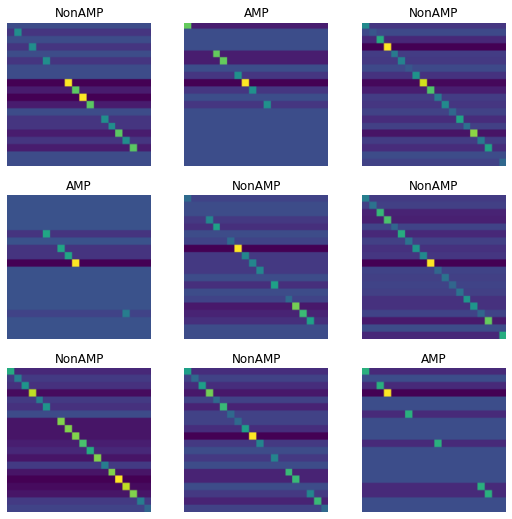

In [5]:
dls  = dblock.dataloaders(path,bs=9)
dls.show_batch()

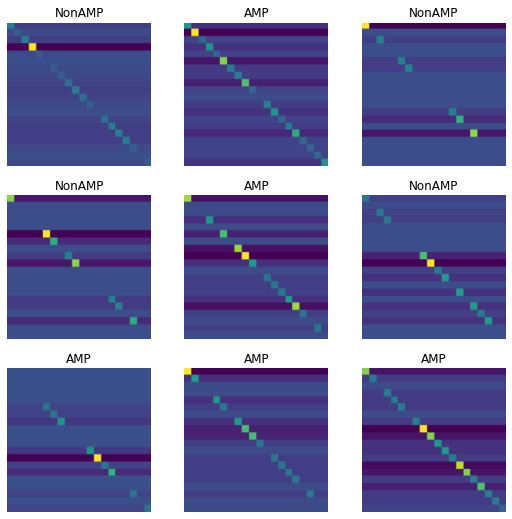

In [12]:
path_test =  "/mnt/vdb/thesis/trainingset2/benchmark_set/images/"
dblock_test = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                get_items = get_image_files,
                get_y     = label_func,
                splitter=RandomSplitter(),
                item_tfms = Resize(200,200) 
               )
dls_test  = dblock.dataloaders(path_test,bs=9)
dls_test.show_batch()

In [6]:
learn = cnn_learner(dls, resnet18,  metrics=[accuracy,error_rate,
                                                 Precision(),
                                                 Recall(),
                                                 F1Score(),
                                                 RocAucBinary()
                                               ])
learn.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,error_rate,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.526250,0.440762,0.791266,0.208734,0.789930,0.795493,0.792702,0.874128,02:46


epoch,train_loss,valid_loss,accuracy,error_rate,precision_score,recall_score,f1_score,roc_auc_score,time
0,0.373590,0.358402,0.847937,0.152063,0.819143,0.894366,0.855104,0.924336,03:11


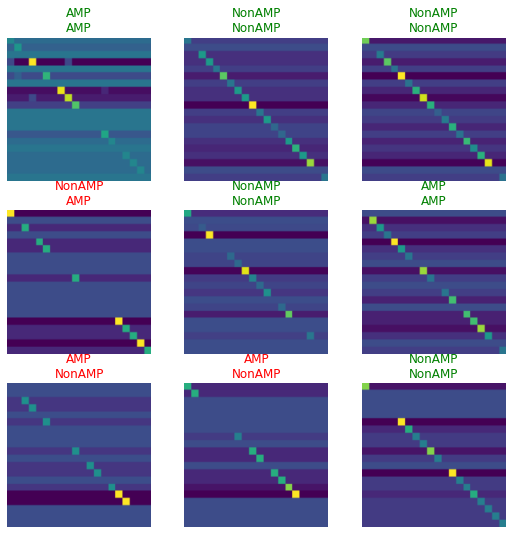

In [7]:
learn.show_results()

              precision    recall  f1-score   support

         AMP       0.88      0.80      0.84      7052
      NonAMP       0.82      0.89      0.86      7100

    accuracy                           0.85     14152
   macro avg       0.85      0.85      0.85     14152
weighted avg       0.85      0.85      0.85     14152



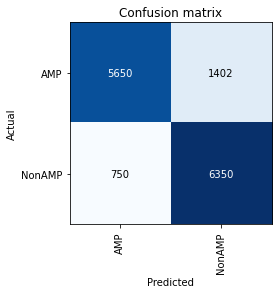

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.print_classification_report()

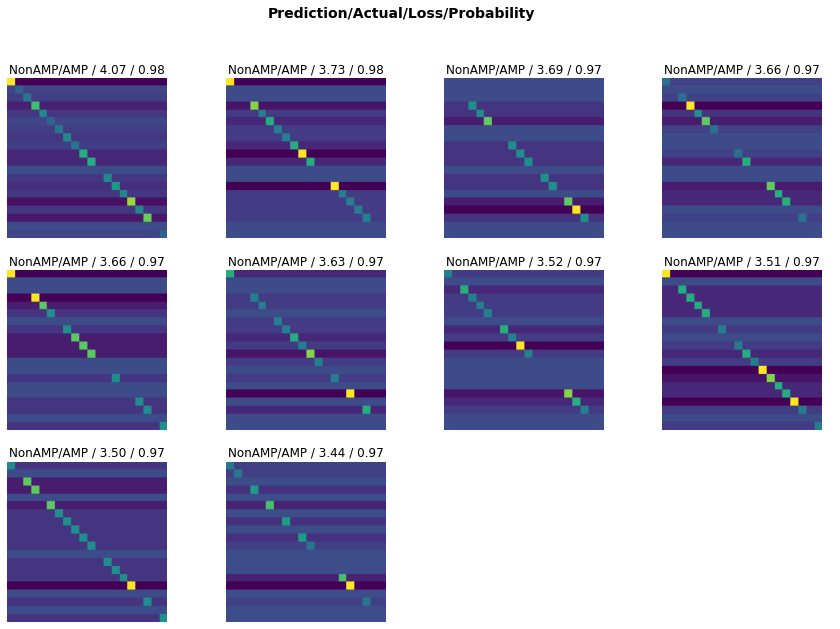

In [9]:
interp.plot_top_losses(10, figsize=(15,10))

In [10]:
learn.export("resnet18_1.pkl")

In [15]:
path_test =  "/mnt/vdb/thesis/trainingset2/benchmark_set/images/"
fnames_test =  get_image_files(path_test)
dl = learn.dls.test_dl(fnames_test , with_labels=True, ordered=True)
_preds,_ignore ,_y_preds =learn.get_preds(dl=dl, with_decoded=True,reorder=False)

In [16]:
print(classification_report( _ignore, _y_preds))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1778
           1       0.75      0.81      0.78      1778

    accuracy                           0.77      3556
   macro avg       0.77      0.77      0.77      3556
weighted avg       0.77      0.77      0.77      3556

